
![alt_text](https://github.com/Explore-AI/Pictures/blob/master/Python-Notebook-Banners/Examples.png?raw=true "Example banner")


# Examples: Search Algorithms
© ExploreAI Academy

In this train, we will cover a variety of search algorithms, including binary and linear search, as well as their implementation and complexity.


## Learning objectives

By the end of this train, you should be able to:

* Understand the concepts of search algorithms and their complexity.
* Create pseudocode for linear and binary search algorithms.




## Searching in Python

Often, we need to determine if a particular character, string, or number is present within a data structure.

Python provides us with two built-in methods to determine if a particular string contains the searched string - `find()` and `RegEx`. We have mathematical operators such as `in` and **lambda functions** to determine if a number is in a list. However, if the data structure is large or the search use case is more complex, we would need searching algorithms with greater flexibility and efficiency.

In this train we will only discuss **linear** and **binary** search algorithms, however, many other techniques and variations can be used, such as **exponential (binary) search**, **fibonacci search**, and **jump search**.

In [1]:
affirm="God Love me so much"
affirm.find("o")


1

## Linear search

One of the simplest search algorithms is *linear search*. The algorithm begins at one end of the list (or data structure) and checks each element until it finds the correct element or it reaches the end of the list. We can think of a linear search algorithm as an enhanced implementation of the Python `in` operator.

Essentially, the linear search algorithm iterates over the list and returns the index of the first occurrence of the searched element when it is found. If there is more than one occurrence of the searched element, a basic linear search function will only return the index of the first occurrence because the other occurrences are not even considered. In other words, the algorithm terminates when it finds an occurrence of the searched element.

In the first example below, we see a list `[11, 2, 26, 18, 23]` in which we are searching for an element with the value `[18]`. We step through the first three elements before finding the first occurrence of the searched item, at which time the function will return the index and terminate. 

In the second example, we see a list with a duplicate value `[11, 2, 2, 18, 23]` in which we are searching for `[2]`. We only need to step through the first element to find the first occurrence of the searched item, and then return and terminate. The second `[2]` and any other elements to the right of the found element are not even considered.

<div align="center" style=" text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/4ab230a66faa24d1d1f78148624e2565fb4ba407/linear_search.jpg?raw=True"
     alt="Linear search"
     style="padding-bottom=0.5em"
     width=400px/>
     <br>
     <em> Figure 2. Visualisation of a basic linear search algorithm of a list of integers. </em>
</div>

Let's write some pseudocode to carry out this algorithm.

```python
# Pseudocode
procedure linear_search( list, target )
    for each element in the list
        if the element equals the target
            return its index

    return not found
end procedure
```

In [4]:
def linear_search(list,target):
    for element in list:
        if element == target:
            return list.index(element)
    return "Not Found"

In [9]:
x=list(range(20))
linear_search(x,123)

'Not Found'


The provided pseudocode defines a procedure named `linear_search` for conducting a linear search on a given list. This search algorithm **iterates through each element** in the list using a `for loop`. Within this loop, an if statement checks whether the **current element is equal to the target element** that the search is trying to locate. If a match is found, the procedure promptly **returns the index** of the identified element. In the event that the entire list is traversed without finding the target element, the procedure concludes by **returning a signal denoting that the element was not found** in the list. 

In summary, this pseudocode encapsulates a straightforward linear search algorithm, sequentially inspecting each element in the list until it either locates the target element or determines its absence.

### Time complexity

Consider the first list in the figure above, `[11, 2, 26, 18, 23]`, but now we want to find `[23]`, which is the last element in the list. The algorithm would have to iterate through every element until the last one before returning something, which is equal to the number of elements in the list. Similarly, if the value we would like to find is not included in the list, we would still have to iterate as many times as there are elements in the list.

So, we can conclude that the highest overall level of either *average* or *worst-case time complexity* is *linear time*, $O(n)$, because as the input size $n$ increases, the algorithm run-time scales with the input size. The *best-case time complexity* is then *constant time*, $O(1)$, when the searched item is the first element in the list.

As a result, linear search is not used often because the same efficiency may be achieved with Python's built-in search techniques. However, a linear search algorithm is useful to find the first occurrence of an element in an **unsorted collection**, unlike most other search algorithms that can only be applied to sorted collections.

## Binary search

A *binary search* algorithm applies a divide-and-conquer strategy. The algorithm **recursively or iteratively halves the list** (or data structure) to narrow the search. So, with each additional divide, we have half the number of elements to search through for the target element. However, this means that the input list **must be sorted** for a binary search technique to work efficiently.

The number of elements in the list, the location of the target element, and the number of iterations required to find the target value may differ depending on whether an iterative or recursive approach is used. 

Consider the below sorted list: 

`[1, 2, 3, 4, 5, 6, 7, 8]`

We want to find the index of `[7]` (the target value).

#### Recursive implementation

In a recursive implementation, say `binary_search_recur(items, target)`, the first recursion would have `[5]` at index 4 as the *midpoint*.

 i.e `len(items)//2` $= 8//2 = 4$. 
 
 Since this midpoint is smaller than the target, we only consider the right side (including the midpoint) of the input list on the second recursion `binary_search_recur(items[mid:], target)`. However, the indexes have now changed because the recursive function only "sees" the right half of the input list. To find the correct index relating to the initial input list, we need to add the resulting index from the second recursion to the midpoint index.

#### Iterative implementation

In an *iterative implementation*, say `binary_search_iter(items, target)`, the first iteration would have `[4]` as the midpoint because we initialise the start and end values rather than the number of items to calculate its index: 

$\textbf{midpoint} = (\text{start} + \text{end})//2$

$\textbf{midpoint} = (0 + (\text{len(items)} - 1))//2$

$\textbf{midpoint} = (0 + (8 - 1))//2$ 

$\textbf{midpoint} = 7//2$

$\textbf{midpoint} = 3$.


Since this midpoint is not equal to and smaller than the target value of `[7]`, the new start value is at index 4, the midpoint at index 5, and the end value at index 7. Again, as the midpoint is not equal to and still smaller than the target value, the new start value is at index 6, the midpoint is also at index 6, and the end value at index 7. Since the midpoint is now equal to the target value, we can return and terminate.

So, for the same list and target value, the recursive implementation had to divide twice, while the iterative implementation had to divide three times. Considering the same list but changing the target value to `[2]` results in three recursions but only two iterations, as observed in the figure below.

<div align="center" style=" text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/6c10e7a981ee4874057785e4ef038eaea1f3da3b/binary_search.jpg?raw=True"
     alt="Binary search"
     style="padding-bottom=0.5em"
     width=700px/>
     <br>
     <em>Figure 3. Visualisation of recursive and iterative binary search algorithms of a list of integers. </em>
</div>

Let's take a look at the pseudocode for the recursive implementation.

```python
# Pseudocode
procedure binary_search_recur( list items, target )

    find the midpoint of items

    if length of items == 1 then
        return midpoint if midpoint is equal to the target value, otherwise return False
    else if midpoint item == target
        return midpoint
    else
        # Recursively divide the sublists further.
        if midpoint item < target
            call binary_search_recur on right side sublist and target value
            return midpoint + call if the call is not False, otherwise return False
        else
            return call binary_search_recur on left side sublist and target value
end procedure
```

In [29]:
def binary_search_recur(list,target):
    #Midpoint 
    mid_point = len(list)//2
    n = len(list)

    if n == 1:
        return mid_point if list[mid_point] == target else False
    elif list[mid_point] == target:
        return mid_point
    else:
        if list[mid_point] < target:
            y=binary_search_recur(list[mid_point:],target)
            return  y + mid_point if y is not False else False # False if y is False else y + mid_point    # 
        else:
            return binary_search_recur(list[:mid_point],target)
    
    


In [30]:
x=list(range(20))
binary_search_recur(x,125)

False

In [19]:
def binary_search_recur(list, target):
    n = len(list)
    if n == 0:
        return False  # Base case: target not found in an empty list
    mid_point = n // 2
    if list[mid_point] == target:
        return mid_point
    elif list[mid_point] < target:
        # Recur on the right half, adjust the index properly
        result = binary_search_recur(list[mid_point + 1:], target)
        return mid_point + 1 + result if result is not False else False
    else:
        # Recur on the left half
        return binary_search_recur(list[:mid_point], target)

# Example usage:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 60
print(binary_search_recur(my_list, target))  # Output: 5 (index of the target element)


False


Recursion in Python is generally slower than iteration because we allocate additional memory. Here is the iterative binary search pseudocode.

```python
# Pseudocode
procedure binary_search_iter( list items, target )

    initialise start value as zero
    initialise end value as length(items) - 1

    while start value <= end value then continue
        mid value = (start + end) divided by 2 (floor division)

        if target == mid item then
            return mid value
        
        if target < mid item then
            end = mid - 1
        else then
            start = mid + 1

    return when not found as False    
end procedure
```

In [31]:
def binary_search_iter(list,target):
    start=0
    end=len(list)-1

    while start <= end:
        mid_val = (start+end) //2

        if target == list[mid_val]:
            return mid_val
        elif target < list[mid_val]:
            end= mid_val - 1
        else:
            start = mid_val +1
    return False


In [37]:
x=list(range(20))
binary_search_iter(x,12)
x


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

The procedure begins by determining the **midpoint** of the given sorted list (`items`). It then checks if the length of the sublist is equal to 1, indicating a single-element list. In such a case, it **compares the midpoint to the target value**. If they match, the procedure returns the midpoint; otherwise, it returns False. If the length is greater than 1 and the midpoint element matches the target, the procedure directly returns the midpoint.

For sublists with a **length greater than 1**, the algorithm recursively divides the list further. **If the midpoint element is less than the target**, it calls `binary_search_recur` on the right side sublist and the target value. **If the result of this recursive call is not False**, it returns the sum of the midpoint and the recursive call; otherwise, it returns False. Conversely, **if the midpoint element is greater than or equal to the target**, the procedure recursively calls `binary_search_recur` on the left side sublist and the target value.

In summary, this pseudocode defines a recursive binary search algorithm that efficiently narrows down the search space by repeatedly dividing the sorted list until the target value is found or it is determined that the target is not present in the list. The use of recursion facilitates a systematic exploration of the sublist, making the search process more efficient.

### Time complexity

A binary search algorithm reduces the input size in each step by halving it, so the required effort decreases with each division. Consider this example where the input list is between 1 and 8, with a target value `[7]` in an iterative binary search implementation:

$[1, 2, 3, 4, 5, 6, 7, 8]: n = 8$

$[5, 6, 7, 8]: 4 = n/2$

$[7, 8]: 2 = (n/2)2$

So the total effort required is:

$n + n/2 + (n/2)2 = n/2^0 + n/2^1 + n/2^2.$

Similarly, if we increase the list size:

$[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]: n = 20$

$[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]:10 = n/2$

$[11, 12, 13, 14]: 4 \approx (n/2)/2$

$[13, 14]: 2 \approx ((n/2)/2)/2$

Now, the total effort is:

$n + n/2 + (n/2)/2 + ((n/2)/2)/2 \approx n/2^0 + n/2^1 + n/2^2 + n/2^3.$

From these two examples, we can deduce that a list with a number of elements equal to $n$ will have in the *worst-case* $k$ iterations so that the length of the list is equal to $n/2^x$. We also know that after $k$ divisions the list will only have one element:

length of list $= n/2^x = 1,$

$n = 2^x.$

We can apply the $\log$ to each side:

$\log_2(n) = \log_2(2x),$

$\log_2(n) = x \log_2(2).$

Since $\log_a(a) = 1$:

$\log_2(n) = x \times 1.$

So, we can say that the *average* and *worst-case time complexity* is $\log_2(n)$, which is *logarithmic time*, and the overall highest level of complexity is $O(\log n)$. Although the divisions were based on an iterative approach, the same applies to recursive binary search techniques which have an *average* and *worst-case time complexity* as $\log_2(n)$. Naturally, if the target value is equal to the midpoint on either the first recursion or iteration, we have a *best-case time complexity* of $O(1)$, *constant time complexity*. 

## Linear vs. Binary 

Now that we have worked through the two search algorithms, it is time to visualise some of the complexities that we referred to in the sections above. To visualise the time complexities of the algorithms, we will conduct a simple experiment to obtain empirical evidence of the claimed complexities. In the experiment, we will generate lists of varying lengths and observe the time it takes to locate an element within the list.

The experiment takes the following form: 

For each sorting algorithm:
   1. Generate a random list of integers. The size of the list varies.
   2. For each list size, execute the sorting algorithm multiple times to obtain an average execution time.
   3. Store the execution times in a list so we can plot the results.
   
To run the described experiments, make sure that you download the following files from the public academy repo and place them in your current working directory: 

* Compiled Python file that will call the appropriate algorithms: [algorithms.py](https://github.com/Explore-AI/Public-Data/blob/master/algorithms.py)
* Python script that contains code to facilitate the above experiment: [search_time_complexity.py](https://github.com/Explore-AI/Public-Data/blob/master/search_time_complexity.py)
* Note: If you get any package errors, remember to check that they've been successfully installed in your environment. 


Run the following code after downloading the required files.

In [1]:
import search_time_complexity as tc
import matplotlib.pyplot as plt
import algorithms as alg

#=================================================================================================
# Initialise a list to reference the appropriate algorithm.
# Initialise a dictionary to store the experimental results.
#=================================================================================================

search_algorithm = ['Linear Search','Binary Search']
table_of_results = {'Linear Search':{},'Binary Search':{}}
#=================================================================================================
# We make use of the functions found in the search_time_complexity package to generate experimental 
# results that will be used for plotting the graphs.
#=================================================================================================

def generate_experiment_results(search_algorithm,table_of_results,STEP=1000, REPS_PER_ARR=1000, MAX_ARR_LEN=10000):
    if search_algorithm == 'Linear Search':
        exec_times, len_of_arrays = tc.run_experiment(alg.linear_search,search_algorithm,STEP,REPS_PER_ARR,MAX_ARR_LEN)
    elif search_algorithm == 'Binary Search':
        exec_times, len_of_arrays = tc.run_experiment(alg.binary_search,search_algorithm,STEP,REPS_PER_ARR,MAX_ARR_LEN)

    table_of_results[search_algorithm]['exec_times'] = exec_times
    table_of_results[search_algorithm]['len_of_arrays'] = len_of_arrays
    return table_of_results

#=================================================================================================
# Execute the function defined above to populate the dictionary with experimental results.
#=================================================================================================
table_of_results = generate_experiment_results('Linear Search',table_of_results)
table_of_results = generate_experiment_results('Binary Search',table_of_results)

Experiment Progress (Binary Search): 100%|██████████| 11/11 [00:00<00:00, 16.42it/s]


In [ ]:
import tqdm

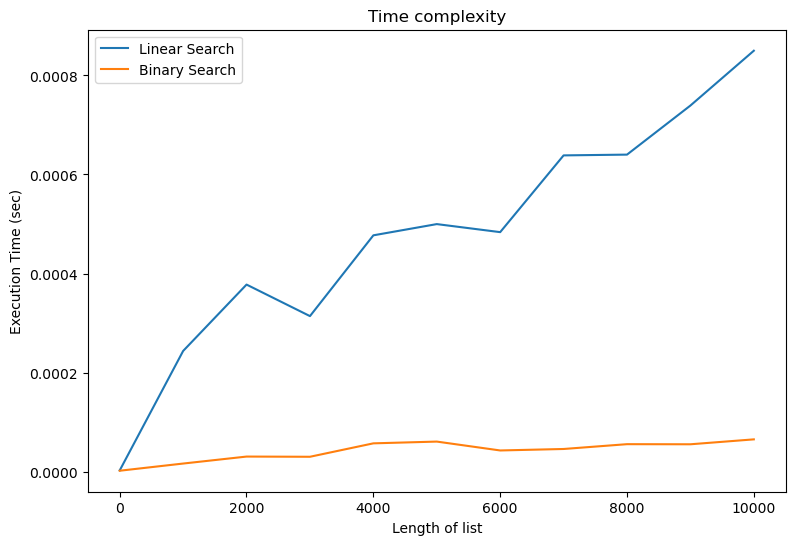

In [2]:
#=================================================================================================
# Use the populated dictionary to plot the time complexities associated with each search
# algorithm.
#=================================================================================================
plt.rcParams['figure.figsize'] = (9, 6)
plt.plot(table_of_results['Linear Search']['exec_times'],table_of_results['Linear Search']['len_of_arrays'])
plt.plot(table_of_results['Binary Search']['exec_times'],table_of_results['Binary Search']['len_of_arrays'])
plt.ylabel('Execution Time (sec)')
plt.xlabel('Length of list')
plt.title('Time complexity')
plt.legend(search_algorithm)

The time complexity graphs generated from the two search algorithms highlight the stark difference in compute times, with binary search clearly showing to be more efficient than your normal linear search. Since the binary search is logarithmic ($O(\log n)$) in nature, it is important to notice that as the size of the list doubles, the time taken to find an element only increases by a fraction. This is because after doubling the size of the list, the algorithm will only take one additional iteration to find the required element. 

As much as the binary search performs better than the linear search, the order of the items in the list is what makes the method efficient. Given a list in random order, it would be futile to try and perform a binary search on the list. However, the linear search does not require the items to be in any order, seeing as it will sequentially sweep through the entire list, so it is always guaranteed to find the element in linear time ($O(n)$). This is the one major advantage that linear search has over its binary counterpart.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>